<a href="https://colab.research.google.com/github/DmitryKutsev/cross-document_coreference/blob/main/classifiers/regr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
style = "<style>svg{width:50% !important;height:10% !important;}</style>"

In [117]:
from IPython.display import SVG, display, HTML

In [118]:
!wget https://raw.githubusercontent.com/DmitryKutsev/cross-document_coreference/main/toy_coref_fasttext20k.csv

--2021-05-08 19:06:47--  https://raw.githubusercontent.com/DmitryKutsev/cross-document_coreference/main/toy_coref_fasttext20k.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1012896 (989K) [text/plain]
Saving to: ‘toy_coref_fasttext20k.csv.2’

toy_coref_fasttext2 100%[===================>] 989.16K  --.-KB/s    in 0.07s   

2021-05-08 19:06:47 (13.9 MB/s) - ‘toy_coref_fasttext20k.csv.2’ saved [1012896/1012896]



In [119]:
cor_df = pd.read_csv('toy_coref_fasttext20k.csv', delimiter='\t')

In [120]:
cor_df = cor_df.drop('HEAD_VECTHEAD_POS', axis=1)


In [121]:
cor_df = cor_df.drop('Unnamed: 20', axis=1)

In [122]:
cor_df

,TOKEN,TOKEN_VECT,POST_NUM,ANIMACY,CASE,GENDER,PERSON,POS,DEPENDENCY,HEAD,HEAD_ANIMACY,HEAD_CASE,HEAD_GENDER,HEAD_POS,SENT_VECTOR,HEAD_CHILDS_VECT,NER,COREFERENCE_CLUSTER,HEAD_VECT
0,На,-0.046335,10,-,-,-,-,PREP,case,рынок,inan,accs,masc,NOUN,0.094495,-0.046335,0,0,0.150048
1,рынок,0.150048,10,inan,accs,masc,-,NOUN,obl,вернулся,-,-,masc,VERB,0.094495,0.056298,0,0,0.284159
2,снова,-0.071036,10,-,-,-,-,ADVB,advmod,вернулся,-,-,masc,VERB,0.094495,0.056298,0,0,0.284159
3,вернулся,0.284159,10,-,-,masc,-,VERB,ROOT,вернулся,-,-,masc,VERB,0.094495,0.056298,0,0,0.284159
4,алимемазин,-0.023104,10,inan,nomn,masc,-,NOUN,nsubj,вернулся,-,-,masc,VERB,0.094495,0.056298,мед,алимемазин,0.284159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6674,3,-0.009287,193,-,-,-,-,-,ROOT,3,-,-,-,-,-0.124611,0.000000,0,0,-0.009287
6675,Пациенты,0.141368,193,anim,nomn,masc,-,NOUN,ROOT,Пациенты,anim,nomn,masc,NOUN,-0.219679,-0.072722,0,0,0.198803
6676,принимавшие,0.195333,193,-,nomn,-,-,PRTF,acl,Пациенты,anim,nomn,masc,NOUN,-0.219679,-0.072722,0,0,0.198803
6677,софосбувир,-0.874638,193,anim,gent,femn,-,NOUN,obj,принимавшие,-,nomn,-,PRTF,-0.219679,-0.874638,мед,софосбувир,0.195333


In [225]:
import seaborn as sns

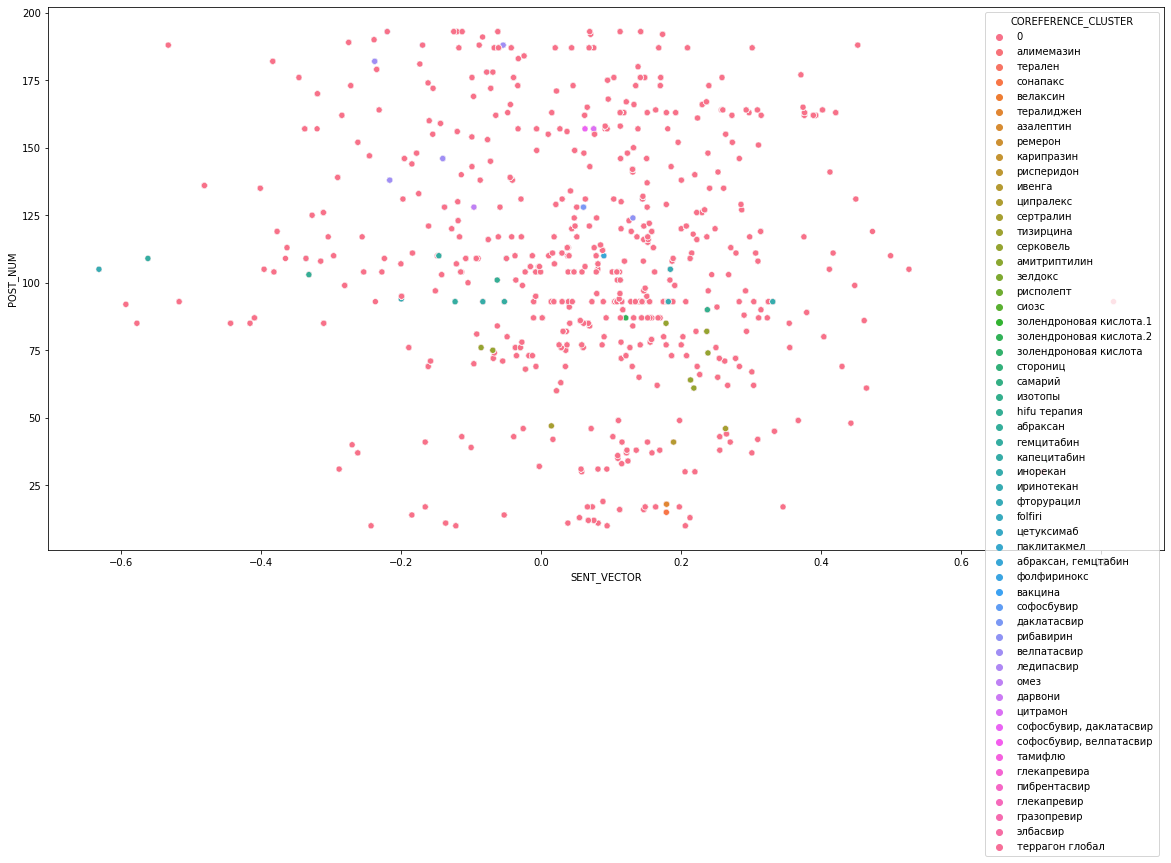

In [233]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x="SENT_VECTOR", y="POST_NUM", data=cor_df, hue="COREFERENCE_CLUSTER")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

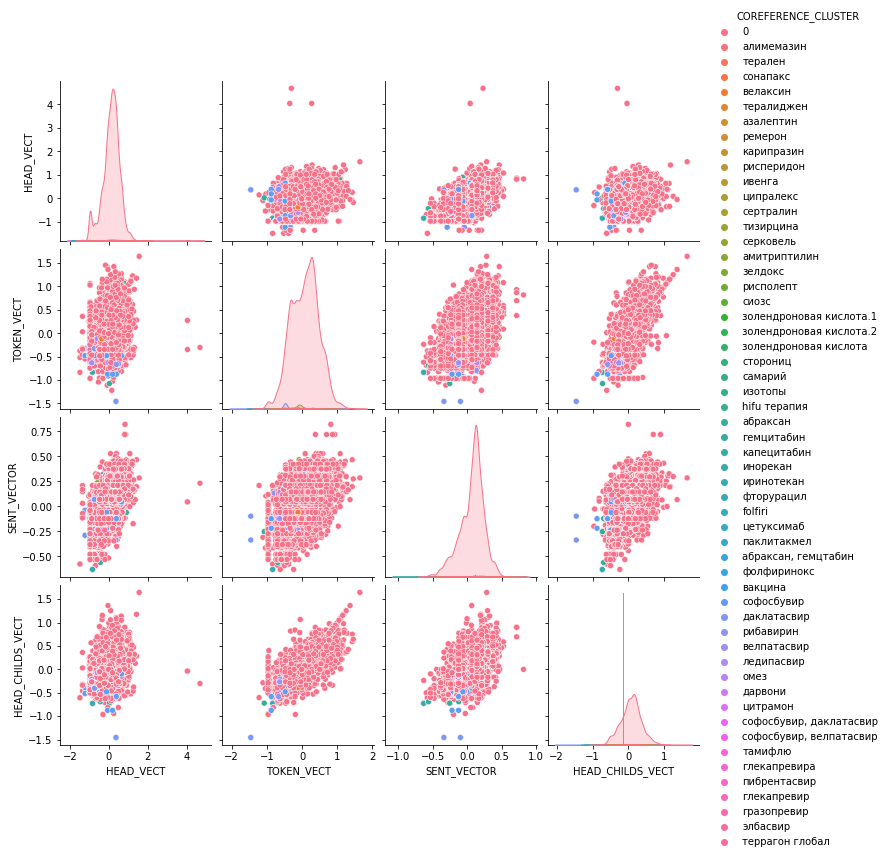

In [235]:
sns.pairplot(vars='HEAD_VECT	TOKEN_VECT	SENT_VECTOR	HEAD_CHILDS_VECT'.split('\t'), data=cor_df, hue="COREFERENCE_CLUSTER")

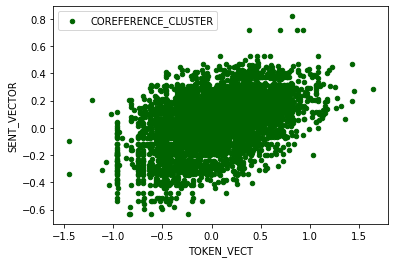

In [224]:
cor_df.plot(x="TOKEN_VECT", y="SENT_VECTOR", color="DarkGreen", label="COREFERENCE_CLUSTER", kind="scatter")

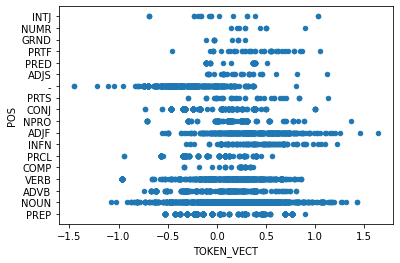

In [221]:
cor_df.plot(x="TOKEN_VECT", y="POS", kind="scatter")

In [123]:
cor_df['HEAD']

0             рынок
1          вернулся
2          вернулся
3          вернулся
4          вернулся
           ...     
6674              3
6675       Пациенты
6676       Пациенты
6677    принимавшие
6678       Пациенты
Name: HEAD, Length: 6679, dtype: object

In [124]:
cor_df.isnull().sum()

TOKEN                   0
TOKEN_VECT              5
POST_NUM                0
ANIMACY                 0
CASE                    0
GENDER                  0
PERSON                  0
POS                     0
DEPENDENCY              0
HEAD                    0
HEAD_ANIMACY            0
HEAD_CASE               0
HEAD_GENDER             0
HEAD_POS                0
SENT_VECTOR             0
HEAD_CHILDS_VECT        0
NER                     1
COREFERENCE_CLUSTER    12
HEAD_VECT              85
dtype: int64

In [172]:
cor_df = cor_df.dropna()

In [125]:
# cor_df = cor_df.iloc[:-5,:]
# cor_df_test = cor_df.iloc[-5:-1,:]


In [126]:
# cor_df_test = cor_df_test.reset_index()
# cor_df_test = cor_df_test.drop(['index'], axis=1)

In [127]:
# cor_df_test = cor_df_test.drop(['level_0'], axis=1)
# cor_df_test

In [173]:
for_factorize_X = 'ANIMACY	CASE	GENDER	PERSON	POS	DEPENDENCY	HEAD_ANIMACY	HEAD_CASE	HEAD_GENDER	HEAD_POS'.split("\t")

In [174]:
X = cor_df.drop(['COREFERENCE_CLUSTER', 'NER', 'TOKEN', 'HEAD'], axis=1)
# X_test = cor_df_test.drop(['COREFERENCE_CLUSTER', 'NER', 'TOKEN'], axis=1)
labels_dict = {}
# test_labels_dict = {}

for i in for_factorize_X:
  X[i], lbl = pd.factorize(X[i])
  labels_dict[i] = lbl

# for i in for_factorize_X:
#   X[i] = [float(i) for i in X[i]]
# for i in X_test.columns:
#   X_test[i], lbl = pd.factorize(X_test[i])
#   test_labels_dict[i] = lbl 

y = cor_df[['COREFERENCE_CLUSTER']]
y['COREFERENCE_CLUSTER'], y_label = pd.factorize(y['COREFERENCE_CLUSTER'])
# y['COREFERENCE_CLUSTER'] = [float(i) for i in y['COREFERENCE_CLUSTER']]
# y_test = cor_df_test['COREFERENCE_CLUSTER']
# y_test, y_test_label = pd.factorize(y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [175]:
y

,COREFERENCE_CLUSTER
0,0
1,0
2,0
3,0
4,1
...,...
6674,0
6675,0
6676,0
6677,38


In [176]:
y.dtypes

COREFERENCE_CLUSTER    int64
dtype: object

In [177]:
type(y)

pandas.core.frame.DataFrame

In [178]:
y_label[2]

'терален'

In [179]:
from sklearn.metrics.pairwise import cosine_similarity

In [180]:
cosine_similarity([[1,2,3]], [[1,2,5]])

array([[0.97590007]])

In [181]:
cosine_similarity([X.iloc[1].values], [X.iloc[1000].values])[-1][-1]

0.9728793917138939

In [182]:
X.iloc[2].to_numpy()

array([-0.07103582, 10.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  2.        ,  2.        ,  1.        ,  1.        ,
        0.        ,  1.        ,  0.0944951 ,  0.0562982 ,  0.28415924])

In [183]:
X.iloc[2].values.reshape(-1, 1)

array([[-0.07103582],
       [10.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 2.        ],
       [ 2.        ],
       [ 1.        ],
       [ 1.        ],
       [ 0.        ],
       [ 1.        ],
       [ 0.0944951 ],
       [ 0.0562982 ],
       [ 0.28415924]])

In [184]:
X.iloc[4].values.reshape(-1, 1)

array([[-0.0231037 ],
       [10.        ],
       [ 1.        ],
       [ 2.        ],
       [ 1.        ],
       [ 0.        ],
       [ 1.        ],
       [ 4.        ],
       [ 1.        ],
       [ 1.        ],
       [ 0.        ],
       [ 1.        ],
       [ 0.0944951 ],
       [ 0.0562982 ],
       [ 0.28415924]])

In [185]:
from graphviz import Source
from sklearn import tree

In [186]:
# tree.plot_tree(clf)

In [187]:
# graph = Source(tree.export_graphviz(clf, out_file=None, 
#                                     feature_names=list(X), class_names=uniques, filled=True))

# display(SVG(graph.pipe(format='svg')))

In [188]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np

In [189]:
X.replace([np.inf, -np.inf], np.nan, inplace=True)

In [170]:
X.shape, y.shape, X.dropna().shape

((6679, 15), (6679, 1), (6590, 15))

In [206]:
y.dtypes

COREFERENCE_CLUSTER    int64
dtype: object

In [79]:
X.dtypes

TOKEN_VECT          float64
POST_NUM              int64
ANIMACY               int64
CASE                  int64
GENDER                int64
PERSON                int64
POS                   int64
DEPENDENCY            int64
HEAD_ANIMACY          int64
HEAD_CASE             int64
HEAD_GENDER           int64
HEAD_POS              int64
SENT_VECTOR         float64
HEAD_CHILDS_VECT    float64
HEAD_VECT           float64
dtype: object

In [239]:

from sklearn.linear_model import LogisticRegression

In [240]:
clf = LogisticRegression()

In [260]:
type(X.iloc[1].values)

numpy.ndarray

In [261]:
list(X.iloc[1].values)

[0.1500484198331833,
 10.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.09449510229751468,
 0.056298195570707324,
 0.28415924310684204]

In [274]:
X.iloc[4].values, y.iloc[4].values[0]

(array([-0.0231037 , 10.        ,  1.        ,  2.        ,  1.        ,
         0.        ,  1.        ,  4.        ,  1.        ,  1.        ,
         0.        ,  1.        ,  0.0944951 ,  0.0562982 ,  0.28415924]), 1)

In [271]:
vects = []
classes = []
for i in range(len(X)):
  vects.append(list(X.iloc[i].values))
  classes.append(y.iloc[i][0])
  # print([X.iloc[i]], X.iloc[i])


In [272]:
vects[0], classes[0]

([-0.046334847807884216,
  10.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.09449510229751468,
  -0.046334847807884216,
  0.1500484198331833],
 0)

In [273]:
clf.fit(vects, classes)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [285]:
for i, vec in enumerate(vects):
  pred = clf.predict([vec])[0]
  if pred != 0:
    print('something', clf.predict([vec]),  classes[i])

something [14] 0
something [14] 0
something [14] 0
something [14] 0
something [14] 0
something [14] 0
something [14] 0
something [14] 0
something [14] 0
something [14] 0
something [14] 0
something [14] 0
something [6] 6
something [6] 0
something [14] 0
something [14] 0
something [14] 0
something [14] 0
something [14] 0
something [27] 14
something [14] 0
something [14] 0
something [25] 0
something [38] 0
something [38] 26
something [25] 0
something [38] 0
something [38] 0
something [38] 0
something [38] 0
something [39] 39
something [39] 39
something [38] 42
something [38] 38
something [38] 38
